In [1]:
# import the required packages

# tabular data
import pandas as pd
import numpy as np 
from tabulate import tabulate

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# train test split
from sklearn.model_selection import train_test_split

# metrics 
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score

# classification models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

# statistical models 
import statsmodels.api as sm

# model evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve


# time - test
import time

## 1. HR Analytics

### 1.1 Load and Sample the data

In [2]:
df_hr = pd.read_csv('./hr_csv_transformed_stan.csv')

In [3]:
df_hr.head()

,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,department_R&D,department_Procurement,department_Finance,department_HR,department_Legal,gender_f,gender_m,recruitment_channel_sourcing,recruitment_channel_other,recruitment_channel_referred
0,6108,1,2.842558,-0.326748,-0.257911,-0.660489,0,0,-0.498370,0,...,0,0,0,0,0,0,1,0,1,0
1,785,1,1.212457,-1.152946,-1.903583,-0.270179,0,0,1.682447,0,...,0,0,0,0,0,0,1,0,1,0
2,1234,2,-0.417644,-0.640591,0.564925,-1.167709,1,0,-1.099974,0,...,0,0,0,0,0,0,1,0,1,0
3,6108,1,-0.417644,-0.805450,0.564925,-1.167709,0,0,-0.423169,0,...,0,0,1,0,0,0,1,1,0,0
4,1701,2,-0.417644,0.878448,-1.903583,1.087391,0,0,-0.648771,0,...,0,0,0,0,0,1,0,1,0,0


In [4]:
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9092 entries, 0 to 9091
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   region                        9092 non-null   int64  
 1   education                     9092 non-null   int64  
 2   no_of_trainings               9092 non-null   float64
 3   age                           9092 non-null   float64
 4   previous_year_rating          9092 non-null   float64
 5   length_of_service             9092 non-null   float64
 6   KPIs_met >80%                 9092 non-null   int64  
 7   awards_won?                   9092 non-null   int64  
 8   avg_training_score            9092 non-null   float64
 9   is_promoted                   9092 non-null   int64  
 10  department_Sales & Marketing  9092 non-null   int64  
 11  department_Operations         9092 non-null   int64  
 12  department_Technology         9092 non-null   int64  
 13  dep

In [5]:
df_hr.describe()

,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,...,department_R&D,department_Procurement,department_Finance,department_HR,department_Legal,gender_f,gender_m,recruitment_channel_sourcing,recruitment_channel_other,recruitment_channel_referred
count,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,...,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000
mean,4584.995381,1.290805,-0.040239,-0.021676,0.221926,-0.014536,0.512868,0.064452,0.260848,0.500000,...,0.015178,0.140013,0.044435,0.036846,0.017268,0.315662,0.684338,0.429059,0.545535,0.025407
std,4079.802512,0.483942,0.911368,0.966744,0.973085,0.982900,0.499862,0.245570,1.090369,0.500027,...,0.122268,0.347020,0.206070,0.188393,0.130275,0.464805,0.464805,0.494969,0.497950,0.157366
min,31.000000,0.000000,-0.417644,-2.612318,-1.903583,-1.890367,0.000000,0.000000,-1.701579,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1234.000000,1.000000,-0.417644,-0.805450,-0.257911,-0.660489,0.000000,0.000000,-0.723971,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2617.000000,1.000000,-0.417644,-0.177110,-0.257911,0.046716,1.000000,0.000000,0.028034,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,6108.000000,2.000000,-0.417644,0.508938,1.387762,0.745036,1.000000,0.000000,1.250044,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,11497.000000,2.000000,10.993062,2.730098,1.387762,3.020797,1.000000,1.000000,2.660054,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df_hr.isnull().sum()

region                          0
education                       0
no_of_trainings                 0
age                             0
previous_year_rating            0
length_of_service               0
KPIs_met >80%                   0
awards_won?                     0
avg_training_score              0
is_promoted                     0
department_Sales & Marketing    0
department_Operations           0
department_Technology           0
department_Analytics            0
department_R&D                  0
department_Procurement          0
department_Finance              0
department_HR                   0
department_Legal                0
gender_f                        0
gender_m                        0
recruitment_channel_sourcing    0
recruitment_channel_other       0
recruitment_channel_referred    0
dtype: int64

In [7]:
# inspect the target class distribution 
df_hr['is_promoted'].value_counts()

0    4546
1    4546
Name: is_promoted, dtype: int64

### 1.1.1 Train and Test Split

In [8]:
X = df_hr.drop(['is_promoted'], axis =1)
y = df_hr['is_promoted']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1.2 Build the Model(s)

- building baseline models, then 2 models will be chosen to focus on 

In [10]:
models = []

model_names = []

### Logisitic Regression

In [11]:
# no hyperparams except random state for consistency in results 
lg = LogisticRegression(random_state=42).fit(X_train, y_train)

models.append(lg)
model_names.append("Logistic Regression")

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree Classifier 

In [12]:
dtree = DecisionTreeClassifier(random_state=42).fit(X_train,y_train)

models.append(dtree)
model_names.append("Decision Tree")

### Random Forest Classifier 

In [13]:
rf = RandomForestClassifier(random_state=42).fit(X_train,y_train)

models.append(rf)
model_names.append("Random Forest")

### Support Vector Classifier 

In [14]:
svc = SVC(random_state = 42).fit(X_train,y_train)

models.append(svc)
model_names.append("SVC")

### MLP Classifier 

In [15]:
mlp = MLPClassifier(random_state = 42).fit(X_train, y_train)

models.append(mlp)
model_names.append("Multi Layer Perceptron")

### ADA Boost 

In [16]:
ada = AdaBoostClassifier(random_state = 42).fit(X_train,y_train)

models.append(ada)
model_names.append("ADA")

### XG Boost 

In [17]:
xgb = XGBClassifier(random_state = 42).fit(X_train, y_train)

models.append(xgb)
model_names.append("XGB")

### 1.3 Evaluate and Improve the Model(s)

In [18]:
def model_scores_classification(model):
    print(f"Model: {model}")
    
    train_pred = model.predict(X_train)
    print(f'\nTraining score: {model.score(X_train, y_train)}')

    test_pred = model.predict(X_test)
    print(f'Testing score: {model.score(X_test, y_test)}')
    
    print('\nTest Report:')
    print(classification_report(y_test, test_pred))
    
    cm = confusion_matrix(y_test, test_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Testing')
    plt.show()

### 1.3.1 Consolidated View of Baseline Model Accuracies 

In [19]:
scores_table = []
for model, name in zip(models, model_names):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    scores_table.append([name, train_score, test_score])

df_scores = pd.DataFrame(scores_table, columns=["Model", "Train Score", "Test Score"])

df_scores

# we just see how models perform differently 

,Model,Train Score,Test Score
0,Logistic Regression,0.735229,0.723240
1,Decision Tree,1.000000,0.747801
2,Random Forest,1.000000,0.792522
3,SVC,0.533941,0.537023
4,Multi Layer Perceptron,0.693589,0.694282
5,ADA,0.782055,0.769428
6,XGB,0.933532,0.799487


### 1.3.2 Choosing Models 
These models will be chosen for further evaluation : <mark>Logistic Regression (Simple Model)</mark>, <mark>Multi Layer Perceptron (Artificial Neural Network)</mark>,<mark>ADA Boost (Ensemble Model)</mark>.

### 1.3.2.1 Statistical Models 
- use statistical models to evaluate coeffients and understanding relationships between features 

In [20]:
# using logit
lgsm = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.429350
         Iterations 8


In [21]:
lgsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            is_promoted   No. Observations:                 6364
Model:                          Logit   Df Residuals:                     6343
Method:                           MLE   Df Model:                           20
Date:                Fri, 26 Jan 2024   Pseudo R-squ.:                  0.3806
Time:                        21:40:54   Log-Likelihood:                -2732.4
converged:                       True   LL-Null:                       -4411.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
region                        6.851e-06   8.88e-06      0.772      0.440   -1.06e-05    2.43e-05
education                        0.1445      0.079      1.818      0.069      -0.011       0.300
no_of_trainings                 -0.0248      0.038     -0.655      0.513      -0.099       0.049
age                             -0.2641      0.051     -5.199      0.000      -0.364      -0.165
previous_year_rating             0.3026      0.037      8.137      0.000       0.230       0.375
length_of_service                0.1385      0.045      3.086      0.002       0.051       0.226
KPIs_met >80%                    2.6255      0.084     31.276      0.000       2.461       2.790
awards_won?                      1.9333      0.210      9.198      0.000       1.521       2.345
avg_training_score               3.8776      0.124     31.287      0.000       3.635       4.120
department_Sales & Marketing     4.3356        nan        nan        nan         nan         nan
department_Operations            1.4617        nan        nan        nan         nan         nan
department_Technology           -3.7091        nan        nan        nan         nan         nan
department_Analytics            -5.1873        nan        nan        nan         nan         nan
department_R&D                  -5.5118        nan        nan        nan         nan         nan
department_Procurement          -1.2128        nan        nan        nan         nan         nan
department_Finance               1.4265        nan        nan        nan         nan         nan
department_HR                    3.9180        nan        nan        nan         nan         nan
department_Legal                 1.1341        nan        nan        nan         nan         nan
gender_f                        -1.6846   1.22e+06  -1.38e-06      1.000   -2.39e+06    2.39e+06
gender_m                        -1.6606   1.22e+06  -1.36e-06      1.000   -2.39e+06    2.39e+06
recruitment_channel_sourcing    -1.2136        nan        nan        nan         nan         nan
recruitment_channel_other       -1.0958        nan        nan        nan         nan         nan
recruitment_channel_referred    -1.0357        nan        nan        nan         nan         nan
================================================================================================
"""

### 1.3.3 Evaluate Chosen Models

### Logistic Regression 

Model: LogisticRegression(random_state=42)

Training score: 0.7352294154619736
Testing score: 0.7232404692082112

Test Report:
              precision    recall  f1-score   support

           0       0.75      0.69      0.72      1389
           1       0.70      0.76      0.73      1339

    accuracy                           0.72      2728
   macro avg       0.72      0.72      0.72      2728
weighted avg       0.73      0.72      0.72      2728



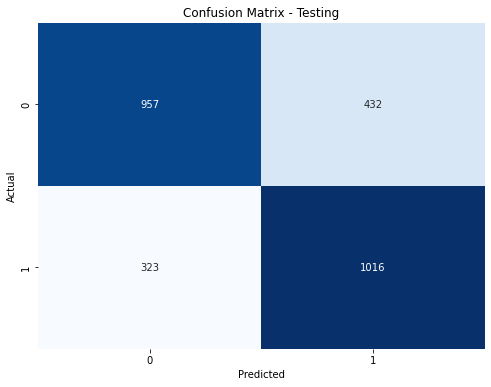

In [22]:
model_scores_classification(lg)

# both train and tests do not have significant differences - it is neither overfitting nor underfitting
# model accuracy can still be improved 

### Multilayer Perceptron 

Model: MLPClassifier(random_state=42)

Training score: 0.6935889377749843
Testing score: 0.6942815249266863

Test Report:
              precision    recall  f1-score   support

           0       0.66      0.81      0.73      1389
           1       0.75      0.57      0.65      1339

    accuracy                           0.69      2728
   macro avg       0.70      0.69      0.69      2728
weighted avg       0.70      0.69      0.69      2728



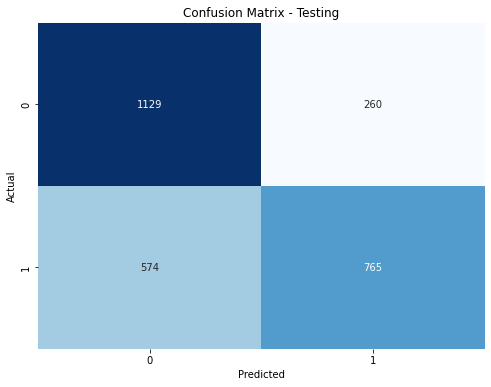

In [23]:
model_scores_classification(mlp)

# model accuracy can be improved
# not much difference between train and test - neither overfitting or underfit 

### ADA Boost 
- currently no base estimators added into the boosting model

Model: AdaBoostClassifier(random_state=42)

Training score: 0.7820553111250785
Testing score: 0.7694281524926686

Test Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1389
           1       0.75      0.79      0.77      1339

    accuracy                           0.77      2728
   macro avg       0.77      0.77      0.77      2728
weighted avg       0.77      0.77      0.77      2728



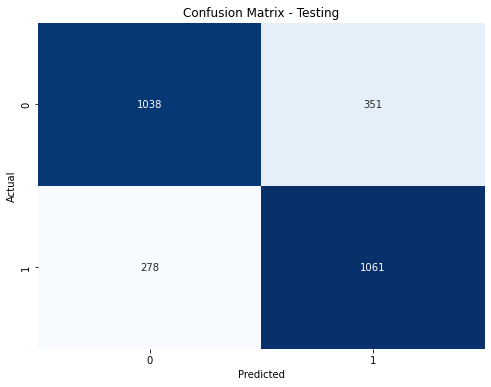

In [24]:
model_scores_classification(ada)

# higher scores than the other models 
# base estimators (the previous models can be added)
# # might be lightly overfitted, there is higher bias against the variance  

### 1.3.3 Model Improvements 

### Logistic Regression 
Hyperparameters that can be tweaked : 
- <mark>C</mark>  : regularisation parameter, higher C may lead to overfiting and lower C may lead to underfitting 
- <mark>penalty</mark> : regularisation term to prevent overfitting 
- <mark>solver</mark> : choice of solver 
- <mark>max_iter</mark> : number of iterations for the solver to converge, low iterations can lead to underfit

### C vs. accuracies 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

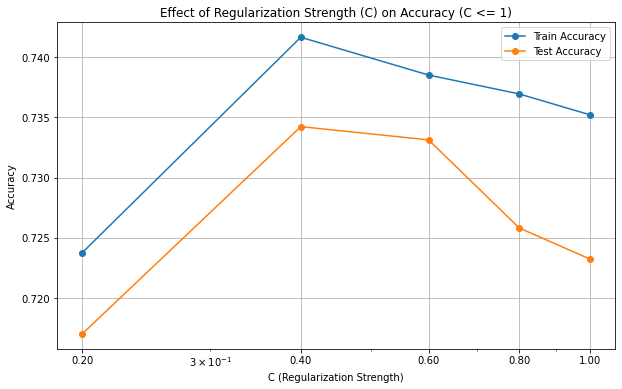

Highest Train Accuracy: 0.742 at C = 0.4
Highest Test Accuracy: 0.734 at C = 0.4


In [25]:
# Assuming you have X_train, X_test, y_train, and y_test
# Replace these with your actual training and testing data

# Define a range of values for C
C_values = [0.2, 0.4, 0.6, 0.8, 1]

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Iterate over different values of C
for C_val in C_values:
    # Train a logistic regression model
    lg = LogisticRegression(C=C_val, random_state=42).fit(X_train, y_train)

    # Predict on the training and testing sets
    y_train_pred = lg.predict(X_train)
    y_test_pred = lg.predict(X_test)

    # Calculate accuracy and store in lists
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.semilogx(C_values, train_accuracies, label='Train Accuracy', marker='o')
plt.semilogx(C_values, test_accuracies, label='Test Accuracy', marker='o')
plt.title('Effect of Regularization Strength (C) on Accuracy (C <= 1)')
plt.xlabel('C (Regularization Strength)')
plt.ylabel('Accuracy')
plt.xticks(C_values, [f"{val:.2f}" for val in C_values])  # Set x-axis ticks to actual values
plt.legend()
plt.grid(True)
plt.show()

# Find the index of the maximum train accuracy
max_train_accuracy_index = train_accuracies.index(max(train_accuracies))
# Find the corresponding C value for the maximum train accuracy
max_train_accuracy_C = C_values[max_train_accuracy_index]

# Find the index of the maximum test accuracy
max_test_accuracy_index = test_accuracies.index(max(test_accuracies))
# Find the corresponding C value for the maximum test accuracy
max_test_accuracy_C = C_values[max_test_accuracy_index]

# Print the results
print(f'Highest Train Accuracy: {max(train_accuracies):.3f} at C = {max_train_accuracy_C}')
print(f'Highest Test Accuracy: {max(test_accuracies):.3f} at C = {max_test_accuracy_C}')

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

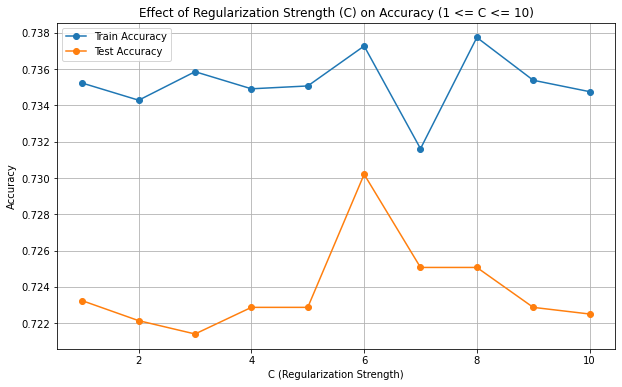

Highest Train Accuracy: 0.738 at C = 8
Highest Test Accuracy: 0.730 at C = 6


In [26]:
# Define a range of values for C from 1 to 10
C_values = list(range(1, 11))

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Iterate over different values of C
for C_val in C_values:
    # Train a logistic regression model
    lg = LogisticRegression(C=C_val, random_state=42).fit(X_train, y_train)

    # Predict on the training and testing sets
    y_train_pred = lg.predict(X_train)
    y_test_pred = lg.predict(X_test)

    # Calculate accuracy and store in lists
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(C_values, test_accuracies, label='Test Accuracy', marker='o')
plt.title('Effect of Regularization Strength (C) on Accuracy (1 <= C <= 10)')
plt.xlabel('C (Regularization Strength)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Find the index of the maximum train accuracy
max_train_accuracy_index = train_accuracies.index(max(train_accuracies))
# Find the corresponding C value for the maximum train accuracy
max_train_accuracy_C = C_values[max_train_accuracy_index]

# Find the index of the maximum test accuracy
max_test_accuracy_index = test_accuracies.index(max(test_accuracies))
# Find the corresponding C value for the maximum test accuracy
max_test_accuracy_C = C_values[max_test_accuracy_index]

# Print the results
print(f'Highest Train Accuracy: {max(train_accuracies):.3f} at C = {max_train_accuracy_C}')
print(f'Highest Test Accuracy: {max(test_accuracies):.3f} at C = {max_test_accuracy_C}')


### max_iter vs. accuracies 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


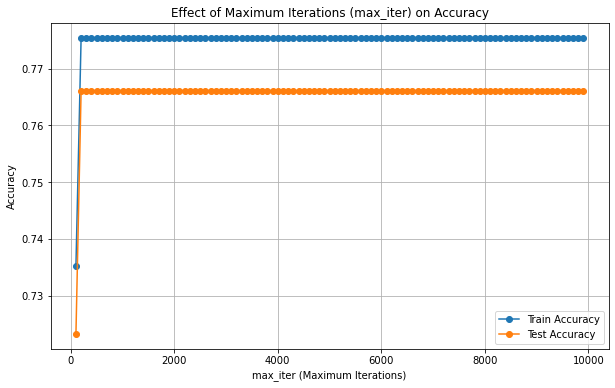

In [27]:
# Define a range of values for max_iter
max_iter_values = np.arange(100, 10000, 100)

# Initialize lists to store training and testing accuracies
train_accuracies = []
test_accuracies = []

# Iterate over different values of max_iter
for max_iter_val in max_iter_values:
    # Train a logistic regression model
    lg = LogisticRegression(max_iter=max_iter_val, random_state=42).fit(X_train, y_train)

    # Predict on the training and testing sets
    y_train_pred = lg.predict(X_train)
    y_test_pred = lg.predict(X_test)

    # Calculate accuracy and store in lists
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(max_iter_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(max_iter_values, test_accuracies, label='Test Accuracy', marker='o')
plt.title('Effect of Maximum Iterations (max_iter) on Accuracy')
plt.xlabel('max_iter (Maximum Iterations)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# important to note that this is subject to different solvers as well 
# the accuracy tends to plateau after 500 iterations 

### Hyperparameter Tuning using GridSearchCV 
- uses cross validation 
- goes through different combinations of parameters 
- from the seeing how the model performs based on individual parameters, it can be used as a gauge on what to values to input

### 1st iteration 

In [28]:
param_grid = {'penalty' : ['l1','l2','elasticnet'], # type of penalty? 
              'C' : [0.2,0.5,0.8,1], # lower C - underfit, higher C - overfit 
              'solver' : ['lbfgs','saga','sag','liblinear','newton-cg','newton-cholesky'], # different solvers 
              'max_iter' : [400,500,600]} # using the range where it was optimal but we want lower 

In [29]:
start_time = time.time()

grid = GridSearchCV(estimator=lg, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5] END C=0.2, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.2, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.2, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=0.2, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=400, penalty=l1, solver=saga;, score=0.573 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=400, penalty=l1, solver=saga;, score=0.583 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=400, penalty=l1, solver=saga;, score=0.577 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=400, penalty=l1, solver=saga;, score=0.535 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=400, penalty=l1, solver=saga;, score=0.577 total time=   1.2s
[CV 1/5] END C=0.2, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.2, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.2, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.2, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.2, max_iter=400, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=400, penalty=l1, solver=liblinear;, score=0.774 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=400, penalty=l1, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=400, penalty=l1, solver=liblinear;, score=0.780 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=400, penalty=l1, solver=liblinear;, score=0.794 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=400, penalty=l2, solver=saga;, score=0.573 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=400, penalty=l2, solver=saga;, score=0.584 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=400, penalty=l2, solver=saga;, score=0.577 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=400, penalty=l2, solver=saga;, score=0.536 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=400, penalty=l2, solver=saga;, score=0.577 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=400, penalty=l2, solver=sag;, score=0.613 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=400, penalty=l2, solver=sag;, score=0.608 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=400, penalty=l2, solver=sag;, score=0.606 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=400, penalty=l2, solver=sag;, score=0.561 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=400, penalty=l2, solver=sag;, score=0.595 total time=   0.7s
[CV 1/5] END C=0.2, max_iter=400, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=400, penalty=l2, solver=liblinear;, score=0.777 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=400, penalty=l2, solver=liblinear;, score=0.792 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=400, penalty=l2, solver=liblinear;, score=0.775 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=400, penalty=l2, solver=liblinear;, score=0.792 total time=   0.0s
[CV 1/5] END C=0.2, max_iter=400, penalty=l2, solver=newton-cg;, score=0.778 total time=   0.2s
[CV 2/5] END C=0.2, max_iter=400, penalty=l2, solver=newton-cg;, score=0.777 total time=   0.2s
[CV 3/5] END C=0.2, max_iter=400, penalty=l2, solver=newton-cg;, score=0.789 total time=   0.1s
[CV 4/5] END C=0.2, max_iter=400, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.2s
[CV 5/5] END C=0.2, max_iter=400, penalty=l2, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.592 total time=   1.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.579 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.544 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=500, penalty=l1, solver=saga;, score=0.583 total time=   1.4s
[CV 1/5] END C=0.2, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.2, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.2, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.2, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.2, max_iter=500, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=500, penalty=l1, solver=liblinear;, score=0.774 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=500, penalty=l1, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=500, penalty=l1, solver=liblinear;, score=0.780 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=500, penalty=l1, solver=liblinear;, score=0.794 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=500, penalty=l2, solver=saga;, score=0.581 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=500, penalty=l2, solver=saga;, score=0.594 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=500, penalty=l2, solver=saga;, score=0.581 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=500, penalty=l2, solver=saga;, score=0.544 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=500, penalty=l2, solver=saga;, score=0.583 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=500, penalty=l2, solver=sag;, score=0.625 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=500, penalty=l2, solver=sag;, score=0.623 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=500, penalty=l2, solver=sag;, score=0.617 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=500, penalty=l2, solver=sag;, score=0.576 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=500, penalty=l2, solver=sag;, score=0.606 total time=   0.9s
[CV 1/5] END C=0.2, max_iter=500, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=500, penalty=l2, solver=liblinear;, score=0.777 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=500, penalty=l2, solver=liblinear;, score=0.792 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=500, penalty=l2, solver=liblinear;, score=0.775 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=500, penalty=l2, solver=liblinear;, score=0.792 total time=   0.0s
[CV 1/5] END C=0.2, max_iter=500, penalty=l2, solver=newton-cg;, score=0.778 total time=   0.2s
[CV 2/5] END C=0.2, max_iter=500, penalty=l2, solver=newton-cg;, score=0.777 total time=   0.2s
[CV 3/5] END C=0.2, max_iter=500, penalty=l2, solver=newton-cg;, score=0.789 total time=   0.2s
[CV 4/5] END C=0.2, max_iter=500, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.2s
[CV 5/5] END C=0.2, max_iter=500, penalty=l2, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=600, penalty=l1, solver=saga;, score=0.593 total time=   2.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=600, penalty=l1, solver=saga;, score=0.596 total time=   1.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=600, penalty=l1, solver=saga;, score=0.589 total time=   2.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=600, penalty=l1, solver=saga;, score=0.551 total time=   2.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=600, penalty=l1, solver=saga;, score=0.588 total time=   2.1s
[CV 1/5] END C=0.2, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.2, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.2, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.2, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.2, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.2, max_iter=600, penalty=l1, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=600, penalty=l1, solver=liblinear;, score=0.774 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=600, penalty=l1, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=600, penalty=l1, solver=liblinear;, score=0.780 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=600, penalty=l1, solver=liblinear;, score=0.794 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=600, penalty=l2, solver=saga;, score=0.592 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=600, penalty=l2, solver=saga;, score=0.596 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=600, penalty=l2, solver=saga;, score=0.590 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=600, penalty=l2, solver=saga;, score=0.551 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=600, penalty=l2, solver=saga;, score=0.588 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.2, max_iter=600, penalty=l2, solver=sag;, score=0.638 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.2, max_iter=600, penalty=l2, solver=sag;, score=0.626 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.2, max_iter=600, penalty=l2, solver=sag;, score=0.625 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.2, max_iter=600, penalty=l2, solver=sag;, score=0.578 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.2, max_iter=600, penalty=l2, solver=sag;, score=0.612 total time=   1.3s
[CV 1/5] END C=0.2, max_iter=600, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 2/5] END C=0.2, max_iter=600, penalty=l2, solver=liblinear;, score=0.777 total time=   0.0s
[CV 3/5] END C=0.2, max_iter=600, penalty=l2, solver=liblinear;, score=0.792 total time=   0.0s
[CV 4/5] END C=0.2, max_iter=600, penalty=l2, solver=liblinear;, score=0.775 total time=   0.0s
[CV 5/5] END C=0.2, max_iter=600, penalty=l2, solver=liblinear;, score=0.792 total time=   0.0s
[CV 1/5] END C=0.2, max_iter=600, penalty=l2, solver=newton-cg;, score=0.778 total time=   0.2s
[CV 2/5] END C=0.2, max_iter=600, penalty=l2, solver=newton-cg;, score=0.777 total time=   0.2s
[CV 3/5] END C=0.2, max_iter=600, penalty=l2, solver=newton-cg;, score=0.789 total time=   0.1s
[CV 4/5] END C=0.2, max_iter=600, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.2s
[CV 5/5] END C=0.2, max_iter=600, penalty=l2, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=400, penalty=l1, solver=saga;, score=0.573 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=400, penalty=l1, solver=saga;, score=0.584 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=400, penalty=l1, solver=saga;, score=0.577 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=400, penalty=l1, solver=saga;, score=0.536 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=400, penalty=l1, solver=saga;, score=0.578 total time=   1.1s
[CV 1/5] END C=0.5, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.5, max_iter=400, penalty=l1, solver=liblinear;, score=0.787 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=400, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=400, penalty=l1, solver=liblinear;, score=0.797 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=400, penalty=l1, solver=liblinear;, score=0.780 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=400, penalty=l1, solver=liblinear;, score=0.794 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5] END C=0.5, max_iter=400, penalty=l2, solver=lbfgs;, score=0.776 total time=   0.1s
[CV 3/5] END C=0.5, max_iter=400, penalty=l2, solver=lbfgs;, score=0.790 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=400, penalty=l2, solver=lbfgs;, score=0.768 total time=   0.1s
[CV 5/5] END C=0.5, max_iter=400, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=400, penalty=l2, solver=saga;, score=0.573 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=400, penalty=l2, solver=saga;, score=0.584 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=400, penalty=l2, solver=saga;, score=0.577 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=400, penalty=l2, solver=saga;, score=0.536 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=400, penalty=l2, solver=saga;, score=0.577 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=400, penalty=l2, solver=sag;, score=0.613 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=400, penalty=l2, solver=sag;, score=0.608 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=400, penalty=l2, solver=sag;, score=0.606 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=400, penalty=l2, solver=sag;, score=0.561 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=400, penalty=l2, solver=sag;, score=0.595 total time=   0.8s
[CV 1/5] END C=0.5, max_iter=400, penalty=l2, solver=liblinear;, score=0.785 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=400, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=400, penalty=l2, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=400, penalty=l2, solver=liblinear;, score=0.781 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=400, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 1/5] END C=0.5, max_iter=400, penalty=l2, solver=newton-cg;, score=0.783 total time=   0.2s
[CV 2/5] END C=0.5, max_iter=400, penalty=l2, solver=newton-cg;, score=0.778 total time=   0.2s
[CV 3/5] END C=0.5, max_iter=400, penalty=l2, solver=newton-cg;, score=0.798 total time=   0.2s
[CV 4/5] END C=0.5, max_iter=400, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=0.5, max_iter=400, penalty=l2, solver=newton-cg;, score=0.793 total time=   0.2s
[CV 1/5] END C=0.5, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=0.5, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=500, penalty=l1, solver=saga;, score=0.584 total time=   1.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=500, penalty=l1, solver=saga;, score=0.594 total time=   1.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=500, penalty=l1, solver=saga;, score=0.581 total time=   1.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=500, penalty=l1, solver=saga;, score=0.544 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=500, penalty=l1, solver=saga;, score=0.583 total time=   1.5s
[CV 1/5] END C=0.5, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.5, max_iter=500, penalty=l1, solver=liblinear;, score=0.787 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=500, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=500, penalty=l1, solver=liblinear;, score=0.797 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=500, penalty=l1, solver=liblinear;, score=0.780 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=500, penalty=l1, solver=liblinear;, score=0.794 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=500, penalty=l2, solver=saga;, score=0.581 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=500, penalty=l2, solver=saga;, score=0.594 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=500, penalty=l2, solver=saga;, score=0.581 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=500, penalty=l2, solver=saga;, score=0.544 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=500, penalty=l2, solver=saga;, score=0.583 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=500, penalty=l2, solver=sag;, score=0.625 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=500, penalty=l2, solver=sag;, score=0.623 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=500, penalty=l2, solver=sag;, score=0.617 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=500, penalty=l2, solver=sag;, score=0.576 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=500, penalty=l2, solver=sag;, score=0.606 total time=   1.1s
[CV 1/5] END C=0.5, max_iter=500, penalty=l2, solver=liblinear;, score=0.785 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=500, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=500, penalty=l2, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=500, penalty=l2, solver=liblinear;, score=0.781 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=500, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 1/5] END C=0.5, max_iter=500, penalty=l2, solver=newton-cg;, score=0.783 total time=   0.2s
[CV 2/5] END C=0.5, max_iter=500, penalty=l2, solver=newton-cg;, score=0.778 total time=   0.1s
[CV 3/5] END C=0.5, max_iter=500, penalty=l2, solver=newton-cg;, score=0.798 total time=   0.2s
[CV 4/5] END C=0.5, max_iter=500, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=0.5, max_iter=500, penalty=l2, solver=newton-cg;, score=0.793 total time=   0.2s
[CV 1/5] END C=0.5, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=0.5, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=600, penalty=l1, solver=saga;, score=0.592 total time=   1.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=600, penalty=l1, solver=saga;, score=0.596 total time=   1.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=600, penalty=l1, solver=saga;, score=0.589 total time=   1.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=600, penalty=l1, solver=saga;, score=0.551 total time=   1.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=600, penalty=l1, solver=saga;, score=0.588 total time=   2.0s
[CV 1/5] END C=0.5, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.5, max_iter=600, penalty=l1, solver=liblinear;, score=0.787 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=600, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=600, penalty=l1, solver=liblinear;, score=0.797 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=600, penalty=l1, solver=liblinear;, score=0.780 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=600, penalty=l1, solver=liblinear;, score=0.794 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=600, penalty=l2, solver=saga;, score=0.592 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=600, penalty=l2, solver=saga;, score=0.596 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=600, penalty=l2, solver=saga;, score=0.590 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=600, penalty=l2, solver=saga;, score=0.551 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=600, penalty=l2, solver=saga;, score=0.588 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.5, max_iter=600, penalty=l2, solver=sag;, score=0.638 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.5, max_iter=600, penalty=l2, solver=sag;, score=0.626 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.5, max_iter=600, penalty=l2, solver=sag;, score=0.625 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.5, max_iter=600, penalty=l2, solver=sag;, score=0.578 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.5, max_iter=600, penalty=l2, solver=sag;, score=0.612 total time=   1.3s
[CV 1/5] END C=0.5, max_iter=600, penalty=l2, solver=liblinear;, score=0.785 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=600, penalty=l2, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=600, penalty=l2, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=600, penalty=l2, solver=liblinear;, score=0.781 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=600, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 1/5] END C=0.5, max_iter=600, penalty=l2, solver=newton-cg;, score=0.783 total time=   0.2s
[CV 2/5] END C=0.5, max_iter=600, penalty=l2, solver=newton-cg;, score=0.778 total time=   0.1s
[CV 3/5] END C=0.5, max_iter=600, penalty=l2, solver=newton-cg;, score=0.798 total time=   0.2s
[CV 4/5] END C=0.5, max_iter=600, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=0.5, max_iter=600, penalty=l2, solver=newton-cg;, score=0.793 total time=   0.2s
[CV 1/5] END C=0.5, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=0.5, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=400, penalty=l1, solver=saga;, score=0.573 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=400, penalty=l1, solver=saga;, score=0.584 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=400, penalty=l1, solver=saga;, score=0.577 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=400, penalty=l1, solver=saga;, score=0.536 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=400, penalty=l1, solver=saga;, score=0.578 total time=   1.2s
[CV 1/5] END C=0.8, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.8, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.8, max_iter=400, penalty=l1, solver=liblinear;, score=0.785 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=400, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=400, penalty=l1, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=400, penalty=l1, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=400, penalty=l1, solver=liblinear;, score=0.797 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=0.8, max_iter=400, penalty=l2, solver=lbfgs;, score=0.779 total time=   0.2s
[CV 4/5] END C=0.8, max_iter=400, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.1s
[CV 5/5] END C=0.8, max_iter=400, penalty=l2, solver=lbfgs;, score=0.784 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=400, penalty=l2, solver=saga;, score=0.573 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=400, penalty=l2, solver=saga;, score=0.584 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=400, penalty=l2, solver=saga;, score=0.577 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=400, penalty=l2, solver=saga;, score=0.536 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=400, penalty=l2, solver=saga;, score=0.577 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=400, penalty=l2, solver=sag;, score=0.613 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=400, penalty=l2, solver=sag;, score=0.608 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=400, penalty=l2, solver=sag;, score=0.606 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=400, penalty=l2, solver=sag;, score=0.561 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=400, penalty=l2, solver=sag;, score=0.595 total time=   0.8s
[CV 1/5] END C=0.8, max_iter=400, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=400, penalty=l2, solver=liblinear;, score=0.776 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=400, penalty=l2, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=400, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=400, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 1/5] END C=0.8, max_iter=400, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=0.8, max_iter=400, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.2s
[CV 3/5] END C=0.8, max_iter=400, penalty=l2, solver=newton-cg;, score=0.795 total time=   0.1s
[CV 4/5] END C=0.8, max_iter=400, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.2s
[CV 5/5] END C=0.8, max_iter=400, penalty=l2, solver=newton-cg;, score=0.797 total time=   0.1s
[CV 1/5] END C=0.8, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=0.8, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=0.8, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.8

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=500, penalty=l1, solver=saga;, score=0.584 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=500, penalty=l1, solver=saga;, score=0.594 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=500, penalty=l1, solver=saga;, score=0.581 total time=   1.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=500, penalty=l1, solver=saga;, score=0.544 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=500, penalty=l1, solver=saga;, score=0.583 total time=   1.3s
[CV 1/5] END C=0.8, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.8, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.8, max_iter=500, penalty=l1, solver=liblinear;, score=0.785 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=500, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=500, penalty=l1, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=500, penalty=l1, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=500, penalty=l1, solver=liblinear;, score=0.797 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=0.8, max_iter=500, penalty=l2, solver=lbfgs;, score=0.786 total time=   0.2s
[CV 4/5] END C=0.8, max_iter=500, penalty=l2, solver=lbfgs;, score=0.766 total time=   0.1s
[CV 5/5] END C=0.8, max_iter=500, penalty=l2, solver=lbfgs;, score=0.784 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=500, penalty=l2, solver=saga;, score=0.581 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=500, penalty=l2, solver=saga;, score=0.594 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=500, penalty=l2, solver=saga;, score=0.581 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=500, penalty=l2, solver=saga;, score=0.544 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=500, penalty=l2, solver=saga;, score=0.583 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=500, penalty=l2, solver=sag;, score=0.625 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=500, penalty=l2, solver=sag;, score=0.623 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=500, penalty=l2, solver=sag;, score=0.617 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=500, penalty=l2, solver=sag;, score=0.576 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=500, penalty=l2, solver=sag;, score=0.606 total time=   1.0s
[CV 1/5] END C=0.8, max_iter=500, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=500, penalty=l2, solver=liblinear;, score=0.776 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=500, penalty=l2, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=500, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=500, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 1/5] END C=0.8, max_iter=500, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=0.8, max_iter=500, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.2s
[CV 3/5] END C=0.8, max_iter=500, penalty=l2, solver=newton-cg;, score=0.795 total time=   0.1s
[CV 4/5] END C=0.8, max_iter=500, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.2s
[CV 5/5] END C=0.8, max_iter=500, penalty=l2, solver=newton-cg;, score=0.797 total time=   0.2s
[CV 1/5] END C=0.8, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=0.8, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=0.8, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.8

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=600, penalty=l1, solver=saga;, score=0.592 total time=   2.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=600, penalty=l1, solver=saga;, score=0.597 total time=   2.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=600, penalty=l1, solver=saga;, score=0.590 total time=   2.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=600, penalty=l1, solver=saga;, score=0.551 total time=   2.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=600, penalty=l1, solver=saga;, score=0.588 total time=   1.9s
[CV 1/5] END C=0.8, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.8, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.8, max_iter=600, penalty=l1, solver=liblinear;, score=0.785 total time=   0.1s
[CV 2/5] END C=0.8, max_iter=600, penalty=l1, solver=liblinear;, score=0.778 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=600, penalty=l1, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=600, penalty=l1, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=600, penalty=l1, solver=liblinear;, score=0.797 total ti

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=600, penalty=l2, solver=saga;, score=0.592 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=600, penalty=l2, solver=saga;, score=0.596 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=600, penalty=l2, solver=saga;, score=0.590 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=600, penalty=l2, solver=saga;, score=0.551 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=600, penalty=l2, solver=saga;, score=0.588 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=0.8, max_iter=600, penalty=l2, solver=sag;, score=0.638 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=0.8, max_iter=600, penalty=l2, solver=sag;, score=0.626 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=0.8, max_iter=600, penalty=l2, solver=sag;, score=0.625 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=0.8, max_iter=600, penalty=l2, solver=sag;, score=0.578 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=0.8, max_iter=600, penalty=l2, solver=sag;, score=0.612 total time=   1.2s
[CV 1/5] END C=0.8, max_iter=600, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 2/5] END C=0.8, max_iter=600, penalty=l2, solver=liblinear;, score=0.776 total time=   0.0s
[CV 3/5] END C=0.8, max_iter=600, penalty=l2, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=0.8, max_iter=600, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=0.8, max_iter=600, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 1/5] END C=0.8, max_iter=600, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=0.8, max_iter=600, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.1s
[CV 3/5] END C=0.8, max_iter=600, penalty=l2, solver=newton-cg;, score=0.795 total time=   0.1s
[CV 4/5] END C=0.8, max_iter=600, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.2s
[CV 5/5] END C=0.8, max_iter=600, penalty=l2, solver=newton-cg;, score=0.797 total time=   0.1s
[CV 1/5] END C=0.8, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=0.8, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=0.8, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=0.8, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=0.8, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=0.8, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.8

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.573 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.584 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.577 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.536 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.578 total time=   1.3s
[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.785 total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.777 total time=   0.1s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.795 total time=   0.1s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.782 total time=   0.1s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.782 total time=   0.2s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.772 total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.573 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.584 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.577 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.536 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.577 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.613 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.608 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.606 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.561 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.595 total time=   0.7s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.777 total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.799 total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.786 total time=   0.1s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.2s
[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.794 total time=   0.2s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.798 total time=   0.2s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.582 total time=   1.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.594 total time=   1.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.581 total time=   1.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.544 total time=   1.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.583 total time=   1.5s
[CV 1/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.785 total time=   0.1s
[CV 2/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.777 total time=   0.1s
[CV 3/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.795 total time=   0.1s
[CV 4/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.782 total time=   0.1s
[CV 5/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.788 total time=   0.3s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.772 total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.581 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.594 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.581 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.544 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.583 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.625 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.623 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.617 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.576 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.606 total time=   1.0s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.777 total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.799 total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.786 total time=   0.1s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.2s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.794 total time=   0.1s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.798 total time=   0.2s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=500, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.592 total time=   2.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.597 total time=   2.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.590 total time=   1.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.551 total time=   1.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.588 total time=   1.8s
[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.785 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.777 total time=   0.1s
[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.795 total time=   0.1s
[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.782 total time=   0.1s
[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.789 total time=   0.3s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.772 total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.592 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.596 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.590 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.551 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.588 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.638 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.626 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.625 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.578 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.612 total time=   1.2s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.777 total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.799 total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.786 total time=   0.2s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.2s
[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.794 total time=   0.1s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
660 fits failed out of a total of 1080.
The score on th

[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.798 total time=   0.2s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=600, 

In [30]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

0.787556754460073
{'C': 1, 'max_iter': 400, 'penalty': 'l2', 'solver': 'liblinear'}
Elapsed Time: 04:37


In [31]:
# improved model from GS - lg2 
lg2 = LogisticRegression(C = 0.8,max_iter=400,penalty='l1',solver='liblinear',random_state=42).fit(X_train,y_train)

Model: LogisticRegression(C=0.8, max_iter=400, penalty='l1', random_state=42,
                   solver='liblinear')

Training score: 0.7906976744186046
Testing score: 0.7741935483870968

Test Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1389
           1       0.75      0.81      0.78      1339

    accuracy                           0.77      2728
   macro avg       0.78      0.77      0.77      2728
weighted avg       0.78      0.77      0.77      2728



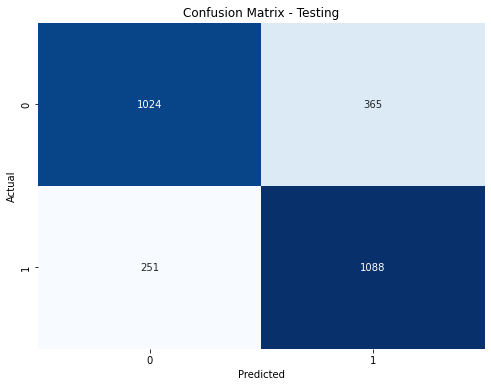

In [32]:
# evaluate 
model_scores_classification(lg2)
# can see that the model score increased but it overfit

### 2nd iteration - higher C range 

In [33]:
param_grid = {'penalty' : ['l1','l2','elasticnet'], # type of penalty? 
              'C' : [1,3,5,7,9], # lower C - underfit, higher C - overfit 
              'solver' : ['lbfgs','saga','sag','liblinear','newton-cg','newton-cholesky'], # different solvers 
              'max_iter' : [400,500,600]} # we want to achieve a model that can perform well at lower iterations 

In [34]:
start_time = time.time()

grid = GridSearchCV(estimator=lg, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.573 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.584 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.577 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.536 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=saga;, score=0.578 total time=   1.3s
[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.785 total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.777 total time=   0.1s
[CV 3/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.795 total time=   0.1s
[CV 4/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.782 total time=   0.1s
[CV 5/5] END C=1, max_iter=400, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.782 total time=   0.2s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.772 total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.573 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.584 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.577 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.536 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=saga;, score=0.577 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.613 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.608 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.606 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.561 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=sag;, score=0.595 total time=   0.7s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.777 total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=liblinear;, score=0.799 total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.786 total time=   0.1s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.2s
[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.794 total time=   0.1s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=newton-cg;, score=0.798 total time=   0.2s
[CV 1/5] END C=1, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=400, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.582 total time=   1.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.594 total time=   1.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.581 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.544 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.583 total time=   1.5s
[CV 1/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.785 total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.777 total time=   0.1s
[CV 3/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.795 total time=   0.1s
[CV 4/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.782 total time=   0.1s
[CV 5/5] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.788 total time=   0.3s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.772 total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.581 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.594 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.581 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.544 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.583 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.625 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.623 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.617 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.576 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=sag;, score=0.606 total time=   1.1s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.777 total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.799 total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.786 total time=   0.1s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.2s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.794 total time=   0.1s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=newton-cg;, score=0.798 total time=   0.2s
[CV 1/5] END C=1, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=500, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.592 total time=   1.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.597 total time=   2.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.590 total time=   1.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.551 total time=   1.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=saga;, score=0.588 total time=   1.9s
[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.785 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.777 total time=   0.1s
[CV 3/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.795 total time=   0.1s
[CV 4/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.782 total time=   0.1s
[CV 5/5] END C=1, max_iter=600, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.789 total time=   0.3s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.772 total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=lbfgs;, score=0.778 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.592 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.596 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.590 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.551 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=saga;, score=0.588 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.638 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.626 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.625 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.578 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=sag;, score=0.612 total time=   1.3s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.786 total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.777 total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=liblinear;, score=0.799 total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.786 total time=   0.2s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.2s
[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.794 total time=   0.1s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.780 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=newton-cg;, score=0.798 total time=   0.2s
[CV 1/5] END C=1, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=1, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=1, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=1, max_iter=600, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=3, max_iter=400, penalty=l1, solver=saga;, score=0.573 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=3, max_iter=400, penalty=l1, solver=saga;, score=0.584 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=3, max_iter=400, penalty=l1, solver=saga;, score=0.577 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=3, max_iter=400, penalty=l1, solver=saga;, score=0.536 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=3, max_iter=400, penalty=l1, solver=saga;, score=0.577 total time=   1.2s
[CV 1/5] END C=3, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=3, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=3, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=3, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=3, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=3, max_iter=400, penalty=l1, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=3, max_iter=400, penalty=l1, solver=liblinear;, score=0.774 total time=   0.1s
[CV 3/5] END C=3, max_iter=400, penalty=l1, solver=liblinear;, score=0.795 total time=   0.1s
[CV 4/5] END C=3, max_iter=400, penalty=l1, solver=liblinear;, score=0.782 total time=   0.2s
[CV 5/5] END C=3, max_iter=400, penalty=l1, solver=liblinear;, score=0.796 total time=   0.4s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=3, max_iter=400, penalty=l2, solver=saga;, score=0.573 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=3, max_iter=400, penalty=l2, solver=saga;, score=0.584 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=3, max_iter=400, penalty=l2, solver=saga;, score=0.577 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=3, max_iter=400, penalty=l2, solver=saga;, score=0.536 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=3, max_iter=400, penalty=l2, solver=saga;, score=0.577 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=3, max_iter=400, penalty=l2, solver=sag;, score=0.613 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=3, max_iter=400, penalty=l2, solver=sag;, score=0.608 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=3, max_iter=400, penalty=l2, solver=sag;, score=0.606 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=3, max_iter=400, penalty=l2, solver=sag;, score=0.561 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=3, max_iter=400, penalty=l2, solver=sag;, score=0.595 total time=   0.8s
[CV 1/5] END C=3, max_iter=400, penalty=l2, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=3, max_iter=400, penalty=l2, solver=liblinear;, score=0.776 total time=   0.0s
[CV 3/5] END C=3, max_iter=400, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 4/5] END C=3, max_iter=400, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=3, max_iter=400, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 1/5] END C=3, max_iter=400, penalty=l2, solver=newton-cg;, score=0.784 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=3, max_iter=400, penalty=l2, solver=newton-cg;, score=0.777 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=3, max_iter=400, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.1s
[CV 4/5] END C=3, max_iter=400, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.2s
[CV 5/5] END C=3, max_iter=400, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.1s
[CV 1/5] END C=3, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=3, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=3, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=3, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=3, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=3, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=3, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=3, max_iter=400, pena

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=3, max_iter=500, penalty=l1, solver=saga;, score=0.581 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=3, max_iter=500, penalty=l1, solver=saga;, score=0.594 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=3, max_iter=500, penalty=l1, solver=saga;, score=0.581 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=3, max_iter=500, penalty=l1, solver=saga;, score=0.544 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=3, max_iter=500, penalty=l1, solver=saga;, score=0.583 total time=   1.4s
[CV 1/5] END C=3, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=3, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=3, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=3, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=3, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=3, max_iter=500, penalty=l1, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=3, max_iter=500, penalty=l1, solver=liblinear;, score=0.774 total time=   0.1s
[CV 3/5] END C=3, max_iter=500, penalty=l1, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=3, max_iter=500, penalty=l1, solver=liblinear;, score=0.782 total time=   0.2s
[CV 5/5] END C=3, max_iter=500, penalty=l1, solver=liblinear;, score=0.796 total time=   0.4s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=3, max_iter=500, penalty=l2, solver=saga;, score=0.581 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=3, max_iter=500, penalty=l2, solver=saga;, score=0.594 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=3, max_iter=500, penalty=l2, solver=saga;, score=0.581 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=3, max_iter=500, penalty=l2, solver=saga;, score=0.544 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=3, max_iter=500, penalty=l2, solver=saga;, score=0.583 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=3, max_iter=500, penalty=l2, solver=sag;, score=0.625 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=3, max_iter=500, penalty=l2, solver=sag;, score=0.623 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=3, max_iter=500, penalty=l2, solver=sag;, score=0.617 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=3, max_iter=500, penalty=l2, solver=sag;, score=0.576 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=3, max_iter=500, penalty=l2, solver=sag;, score=0.606 total time=   1.0s
[CV 1/5] END C=3, max_iter=500, penalty=l2, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=3, max_iter=500, penalty=l2, solver=liblinear;, score=0.776 total time=   0.0s
[CV 3/5] END C=3, max_iter=500, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 4/5] END C=3, max_iter=500, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=3, max_iter=500, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 1/5] END C=3, max_iter=500, penalty=l2, solver=newton-cg;, score=0.784 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=3, max_iter=500, penalty=l2, solver=newton-cg;, score=0.777 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=3, max_iter=500, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.1s
[CV 4/5] END C=3, max_iter=500, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.2s
[CV 5/5] END C=3, max_iter=500, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.1s
[CV 1/5] END C=3, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=3, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=3, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=3, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=3, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=3, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=3, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=3, max_iter=500, pena

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=3, max_iter=600, penalty=l1, solver=saga;, score=0.592 total time=   1.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=3, max_iter=600, penalty=l1, solver=saga;, score=0.596 total time=   2.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=3, max_iter=600, penalty=l1, solver=saga;, score=0.590 total time=   2.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=3, max_iter=600, penalty=l1, solver=saga;, score=0.551 total time=   2.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=3, max_iter=600, penalty=l1, solver=saga;, score=0.588 total time=   2.4s
[CV 1/5] END C=3, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=3, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=3, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=3, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=3, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=3, max_iter=600, penalty=l1, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=3, max_iter=600, penalty=l1, solver=liblinear;, score=0.774 total time=   0.1s
[CV 3/5] END C=3, max_iter=600, penalty=l1, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=3, max_iter=600, penalty=l1, solver=liblinear;, score=0.782 total time=   0.2s
[CV 5/5] END C=3, max_iter=600, penalty=l1, solver=liblinear;, score=0.796 total time=   0.4s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=3, max_iter=600, penalty=l2, solver=saga;, score=0.592 total time=   1.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=3, max_iter=600, penalty=l2, solver=saga;, score=0.596 total time=   1.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=3, max_iter=600, penalty=l2, solver=saga;, score=0.590 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=3, max_iter=600, penalty=l2, solver=saga;, score=0.551 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=3, max_iter=600, penalty=l2, solver=saga;, score=0.588 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=3, max_iter=600, penalty=l2, solver=sag;, score=0.638 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=3, max_iter=600, penalty=l2, solver=sag;, score=0.626 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=3, max_iter=600, penalty=l2, solver=sag;, score=0.625 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=3, max_iter=600, penalty=l2, solver=sag;, score=0.578 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=3, max_iter=600, penalty=l2, solver=sag;, score=0.612 total time=   1.1s
[CV 1/5] END C=3, max_iter=600, penalty=l2, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=3, max_iter=600, penalty=l2, solver=liblinear;, score=0.776 total time=   0.0s
[CV 3/5] END C=3, max_iter=600, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 4/5] END C=3, max_iter=600, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=3, max_iter=600, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 1/5] END C=3, max_iter=600, penalty=l2, solver=newton-cg;, score=0.784 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=3, max_iter=600, penalty=l2, solver=newton-cg;, score=0.777 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=3, max_iter=600, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.1s
[CV 4/5] END C=3, max_iter=600, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.3s
[CV 5/5] END C=3, max_iter=600, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.2s
[CV 1/5] END C=3, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=3, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=3, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=3, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=3, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=3, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=3, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=3, max_iter=600, pena

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=5, max_iter=400, penalty=l1, solver=saga;, score=0.573 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=5, max_iter=400, penalty=l1, solver=saga;, score=0.584 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=5, max_iter=400, penalty=l1, solver=saga;, score=0.577 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=5, max_iter=400, penalty=l1, solver=saga;, score=0.536 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=5, max_iter=400, penalty=l1, solver=saga;, score=0.577 total time=   1.3s
[CV 1/5] END C=5, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=5, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=5, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=5, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=5, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=5, max_iter=400, penalty=l1, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=5, max_iter=400, penalty=l1, solver=liblinear;, score=0.774 total time=   0.0s
[CV 3/5] END C=5, max_iter=400, penalty=l1, solver=liblinear;, score=0.795 total time=   0.4s
[CV 4/5] END C=5, max_iter=400, penalty=l1, solver=liblinear;, score=0.781 total time=   0.2s
[CV 5/5] END C=5, max_iter=400, penalty=l1, solver=liblinear;, score=0.796 total time=   0.5s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=5, max_iter=400, penalty=l2, solver=lbfgs;, score=0.791 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=5, max_iter=400, penalty=l2, solver=saga;, score=0.573 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=5, max_iter=400, penalty=l2, solver=saga;, score=0.584 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=5, max_iter=400, penalty=l2, solver=saga;, score=0.577 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=5, max_iter=400, penalty=l2, solver=saga;, score=0.536 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=5, max_iter=400, penalty=l2, solver=saga;, score=0.577 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=5, max_iter=400, penalty=l2, solver=sag;, score=0.613 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=5, max_iter=400, penalty=l2, solver=sag;, score=0.608 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=5, max_iter=400, penalty=l2, solver=sag;, score=0.606 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=5, max_iter=400, penalty=l2, solver=sag;, score=0.561 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=5, max_iter=400, penalty=l2, solver=sag;, score=0.595 total time=   0.9s
[CV 1/5] END C=5, max_iter=400, penalty=l2, solver=liblinear;, score=0.785 total time=   0.0s
[CV 2/5] END C=5, max_iter=400, penalty=l2, solver=liblinear;, score=0.777 total time=   0.0s
[CV 3/5] END C=5, max_iter=400, penalty=l2, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=5, max_iter=400, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=5, max_iter=400, penalty=l2, solver=liblinear;, score=0.797 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 1/5] END C=5, max_iter=400, penalty=l2, solver=newton-cg;, score=0.784 total time=   0.2s
[CV 2/5] END C=5, max_iter=400, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(ms

[CV 3/5] END C=5, max_iter=400, penalty=l2, solver=newton-cg;, score=0.795 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 4/5] END C=5, max_iter=400, penalty=l2, solver=newton-cg;, score=0.781 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=5, max_iter=400, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.2s
[CV 1/5] END C=5, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=5, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=5, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=5, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=5, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=5, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=5, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=5, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=5, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=5, max_iter=400, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=5, max_iter=500, penalty=l1, solver=saga;, score=0.581 total time=   1.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=5, max_iter=500, penalty=l1, solver=saga;, score=0.594 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=5, max_iter=500, penalty=l1, solver=saga;, score=0.581 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=5, max_iter=500, penalty=l1, solver=saga;, score=0.544 total time=   1.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=5, max_iter=500, penalty=l1, solver=saga;, score=0.583 total time=   1.5s
[CV 1/5] END C=5, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=5, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=5, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=5, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=5, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=5, max_iter=500, penalty=l1, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=5, max_iter=500, penalty=l1, solver=liblinear;, score=0.774 total time=   0.0s
[CV 3/5] END C=5, max_iter=500, penalty=l1, solver=liblinear;, score=0.795 total time=   0.3s
[CV 4/5] END C=5, max_iter=500, penalty=l1, solver=liblinear;, score=0.781 total time=   0.2s
[CV 5/5] END C=5, max_iter=500, penalty=l1, solver=liblinear;, score=0.796 total time=   0.4s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=5, max_iter=500, penalty=l2, solver=saga;, score=0.581 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=5, max_iter=500, penalty=l2, solver=saga;, score=0.594 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=5, max_iter=500, penalty=l2, solver=saga;, score=0.581 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=5, max_iter=500, penalty=l2, solver=saga;, score=0.544 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=5, max_iter=500, penalty=l2, solver=saga;, score=0.583 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=5, max_iter=500, penalty=l2, solver=sag;, score=0.625 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=5, max_iter=500, penalty=l2, solver=sag;, score=0.623 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=5, max_iter=500, penalty=l2, solver=sag;, score=0.617 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=5, max_iter=500, penalty=l2, solver=sag;, score=0.576 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=5, max_iter=500, penalty=l2, solver=sag;, score=0.606 total time=   0.9s
[CV 1/5] END C=5, max_iter=500, penalty=l2, solver=liblinear;, score=0.785 total time=   0.0s
[CV 2/5] END C=5, max_iter=500, penalty=l2, solver=liblinear;, score=0.777 total time=   0.0s
[CV 3/5] END C=5, max_iter=500, penalty=l2, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=5, max_iter=500, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=5, max_iter=500, penalty=l2, solver=liblinear;, score=0.797 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 1/5] END C=5, max_iter=500, penalty=l2, solver=newton-cg;, score=0.784 total time=   0.1s
[CV 2/5] END C=5, max_iter=500, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(ms

[CV 3/5] END C=5, max_iter=500, penalty=l2, solver=newton-cg;, score=0.795 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 4/5] END C=5, max_iter=500, penalty=l2, solver=newton-cg;, score=0.781 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=5, max_iter=500, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.2s
[CV 1/5] END C=5, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=5, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=5, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=5, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=5, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=5, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=5, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=5, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=5, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=5, max_iter=500, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=5, max_iter=600, penalty=l1, solver=saga;, score=0.592 total time=   2.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=5, max_iter=600, penalty=l1, solver=saga;, score=0.596 total time=   1.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=5, max_iter=600, penalty=l1, solver=saga;, score=0.590 total time=   2.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=5, max_iter=600, penalty=l1, solver=saga;, score=0.551 total time=   2.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=5, max_iter=600, penalty=l1, solver=saga;, score=0.588 total time=   1.9s
[CV 1/5] END C=5, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=5, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=5, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=5, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=5, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=5, max_iter=600, penalty=l1, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=5, max_iter=600, penalty=l1, solver=liblinear;, score=0.774 total time=   0.0s
[CV 3/5] END C=5, max_iter=600, penalty=l1, solver=liblinear;, score=0.795 total time=   0.3s
[CV 4/5] END C=5, max_iter=600, penalty=l1, solver=liblinear;, score=0.781 total time=   0.2s
[CV 5/5] END C=5, max_iter=600, penalty=l1, solver=liblinear;, score=0.796 total time=   0.6s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=5, max_iter=600, penalty=l2, solver=saga;, score=0.592 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=5, max_iter=600, penalty=l2, solver=saga;, score=0.596 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=5, max_iter=600, penalty=l2, solver=saga;, score=0.590 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=5, max_iter=600, penalty=l2, solver=saga;, score=0.551 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=5, max_iter=600, penalty=l2, solver=saga;, score=0.588 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=5, max_iter=600, penalty=l2, solver=sag;, score=0.638 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=5, max_iter=600, penalty=l2, solver=sag;, score=0.626 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=5, max_iter=600, penalty=l2, solver=sag;, score=0.625 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=5, max_iter=600, penalty=l2, solver=sag;, score=0.578 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=5, max_iter=600, penalty=l2, solver=sag;, score=0.612 total time=   1.3s
[CV 1/5] END C=5, max_iter=600, penalty=l2, solver=liblinear;, score=0.785 total time=   0.0s
[CV 2/5] END C=5, max_iter=600, penalty=l2, solver=liblinear;, score=0.777 total time=   0.0s
[CV 3/5] END C=5, max_iter=600, penalty=l2, solver=liblinear;, score=0.795 total time=   0.0s
[CV 4/5] END C=5, max_iter=600, penalty=l2, solver=liblinear;, score=0.782 total time=   0.0s
[CV 5/5] END C=5, max_iter=600, penalty=l2, solver=liblinear;, score=0.797 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 1/5] END C=5, max_iter=600, penalty=l2, solver=newton-cg;, score=0.784 total time=   0.1s
[CV 2/5] END C=5, max_iter=600, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(ms

[CV 3/5] END C=5, max_iter=600, penalty=l2, solver=newton-cg;, score=0.795 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 4/5] END C=5, max_iter=600, penalty=l2, solver=newton-cg;, score=0.781 total time=   0.3s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=5, max_iter=600, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.2s
[CV 1/5] END C=5, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=5, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=5, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=5, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=5, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=5, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=5, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=5, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=5, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=5, max_iter=600, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=7, max_iter=400, penalty=l1, solver=saga;, score=0.573 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=7, max_iter=400, penalty=l1, solver=saga;, score=0.584 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=7, max_iter=400, penalty=l1, solver=saga;, score=0.577 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=7, max_iter=400, penalty=l1, solver=saga;, score=0.536 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=7, max_iter=400, penalty=l1, solver=saga;, score=0.577 total time=   1.1s
[CV 1/5] END C=7, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=7, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=7, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=7, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=7, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=7, max_iter=400, penalty=l1, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=7, max_iter=400, penalty=l1, solver=liblinear;, score=0.774 total time=   0.8s
[CV 3/5] END C=7, max_iter=400, penalty=l1, solver=liblinear;, score=0.794 total time=   0.6s
[CV 4/5] END C=7, max_iter=400, penalty=l1, solver=liblinear;, score=0.781 total time=   0.0s
[CV 5/5] END C=7, max_iter=400, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5] END C=7, max_iter=400, penalty=l2, solver=lbfgs;, score=0.789 total time=   0.2s
[CV 4/5] END C=7, max_iter=400, penalty=l2, solver=lbfgs;, score=0.768 total time=   0.0s
[CV 5/5] END C=7, max_iter=400, penalty=l2, solver=lbfgs;, score=0.780 total time=   0.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=7, max_iter=400, penalty=l2, solver=saga;, score=0.573 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=7, max_iter=400, penalty=l2, solver=saga;, score=0.584 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=7, max_iter=400, penalty=l2, solver=saga;, score=0.577 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=7, max_iter=400, penalty=l2, solver=saga;, score=0.536 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=7, max_iter=400, penalty=l2, solver=saga;, score=0.577 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=7, max_iter=400, penalty=l2, solver=sag;, score=0.613 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=7, max_iter=400, penalty=l2, solver=sag;, score=0.608 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=7, max_iter=400, penalty=l2, solver=sag;, score=0.606 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=7, max_iter=400, penalty=l2, solver=sag;, score=0.561 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=7, max_iter=400, penalty=l2, solver=sag;, score=0.595 total time=   0.8s
[CV 1/5] END C=7, max_iter=400, penalty=l2, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=7, max_iter=400, penalty=l2, solver=liblinear;, score=0.775 total time=   0.0s
[CV 3/5] END C=7, max_iter=400, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=7, max_iter=400, penalty=l2, solver=liblinear;, score=0.785 total time=   0.0s
[CV 5/5] END C=7, max_iter=400, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] END C=7, max_iter=400, penalty=l2, solver=newton-cg;, score=0.784 total time=   0.2s
[CV 2/5] END C=7, max_iter=400, penalty=l2, solver=newton-cg;, score=0.775 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=7, max_iter=400, penalty=l2, solver=newton-cg;, score=0.794 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 4/5] END C=7, max_iter=400, penalty=l2, solver=newton-cg;, score=0.781 total time=   0.2s
[CV 5/5] END C=7, max_iter=400, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.3s
[CV 1/5] END C=7, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=7, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=7, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=7, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=7, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=7, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=7, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=7, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=7, max_iter=400, pe

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=7, max_iter=500, penalty=l1, solver=saga;, score=0.581 total time=   1.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=7, max_iter=500, penalty=l1, solver=saga;, score=0.594 total time=   1.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=7, max_iter=500, penalty=l1, solver=saga;, score=0.581 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=7, max_iter=500, penalty=l1, solver=saga;, score=0.544 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=7, max_iter=500, penalty=l1, solver=saga;, score=0.583 total time=   1.6s
[CV 1/5] END C=7, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=7, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=7, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=7, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=7, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=7, max_iter=500, penalty=l1, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=7, max_iter=500, penalty=l1, solver=liblinear;, score=0.774 total time=   0.7s
[CV 3/5] END C=7, max_iter=500, penalty=l1, solver=liblinear;, score=0.794 total time=   0.5s
[CV 4/5] END C=7, max_iter=500, penalty=l1, solver=liblinear;, score=0.781 total time=   0.0s
[CV 5/5] END C=7, max_iter=500, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=7, max_iter=500, penalty=l2, solver=saga;, score=0.581 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=7, max_iter=500, penalty=l2, solver=saga;, score=0.594 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=7, max_iter=500, penalty=l2, solver=saga;, score=0.581 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=7, max_iter=500, penalty=l2, solver=saga;, score=0.544 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=7, max_iter=500, penalty=l2, solver=saga;, score=0.583 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=7, max_iter=500, penalty=l2, solver=sag;, score=0.625 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=7, max_iter=500, penalty=l2, solver=sag;, score=0.623 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=7, max_iter=500, penalty=l2, solver=sag;, score=0.617 total time=   1.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=7, max_iter=500, penalty=l2, solver=sag;, score=0.576 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=7, max_iter=500, penalty=l2, solver=sag;, score=0.606 total time=   1.1s
[CV 1/5] END C=7, max_iter=500, penalty=l2, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=7, max_iter=500, penalty=l2, solver=liblinear;, score=0.775 total time=   0.0s
[CV 3/5] END C=7, max_iter=500, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=7, max_iter=500, penalty=l2, solver=liblinear;, score=0.785 total time=   0.0s
[CV 5/5] END C=7, max_iter=500, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] END C=7, max_iter=500, penalty=l2, solver=newton-cg;, score=0.784 total time=   0.2s
[CV 2/5] END C=7, max_iter=500, penalty=l2, solver=newton-cg;, score=0.775 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=7, max_iter=500, penalty=l2, solver=newton-cg;, score=0.794 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 4/5] END C=7, max_iter=500, penalty=l2, solver=newton-cg;, score=0.781 total time=   0.2s
[CV 5/5] END C=7, max_iter=500, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.2s
[CV 1/5] END C=7, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=7, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=7, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=7, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=7, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=7, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=7, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=7, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=7, max_iter=500, pe

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=7, max_iter=600, penalty=l1, solver=saga;, score=0.592 total time=   2.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=7, max_iter=600, penalty=l1, solver=saga;, score=0.596 total time=   2.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=7, max_iter=600, penalty=l1, solver=saga;, score=0.590 total time=   1.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=7, max_iter=600, penalty=l1, solver=saga;, score=0.551 total time=   1.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=7, max_iter=600, penalty=l1, solver=saga;, score=0.588 total time=   1.8s
[CV 1/5] END C=7, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=7, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=7, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=7, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=7, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=7, max_iter=600, penalty=l1, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=7, max_iter=600, penalty=l1, solver=liblinear;, score=0.774 total time=   0.8s
[CV 3/5] END C=7, max_iter=600, penalty=l1, solver=liblinear;, score=0.794 total time=   0.6s
[CV 4/5] END C=7, max_iter=600, penalty=l1, solver=liblinear;, score=0.781 total time=   0.0s
[CV 5/5] END C=7, max_iter=600, penalty=l1, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=7, max_iter=600, penalty=l2, solver=saga;, score=0.592 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=7, max_iter=600, penalty=l2, solver=saga;, score=0.596 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=7, max_iter=600, penalty=l2, solver=saga;, score=0.590 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=7, max_iter=600, penalty=l2, solver=saga;, score=0.551 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=7, max_iter=600, penalty=l2, solver=saga;, score=0.588 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=7, max_iter=600, penalty=l2, solver=sag;, score=0.638 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=7, max_iter=600, penalty=l2, solver=sag;, score=0.626 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=7, max_iter=600, penalty=l2, solver=sag;, score=0.625 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=7, max_iter=600, penalty=l2, solver=sag;, score=0.578 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=7, max_iter=600, penalty=l2, solver=sag;, score=0.612 total time=   1.2s
[CV 1/5] END C=7, max_iter=600, penalty=l2, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=7, max_iter=600, penalty=l2, solver=liblinear;, score=0.775 total time=   0.0s
[CV 3/5] END C=7, max_iter=600, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=7, max_iter=600, penalty=l2, solver=liblinear;, score=0.785 total time=   0.0s
[CV 5/5] END C=7, max_iter=600, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/5] END C=7, max_iter=600, penalty=l2, solver=newton-cg;, score=0.784 total time=   0.1s
[CV 2/5] END C=7, max_iter=600, penalty=l2, solver=newton-cg;, score=0.775 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 3/5] END C=7, max_iter=600, penalty=l2, solver=newton-cg;, score=0.794 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 4/5] END C=7, max_iter=600, penalty=l2, solver=newton-cg;, score=0.781 total time=   0.2s
[CV 5/5] END C=7, max_iter=600, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.2s
[CV 1/5] END C=7, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=7, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=7, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=7, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=7, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=7, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=7, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=7, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=7, max_iter=600, pe

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=9, max_iter=400, penalty=l1, solver=saga;, score=0.573 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=9, max_iter=400, penalty=l1, solver=saga;, score=0.584 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=9, max_iter=400, penalty=l1, solver=saga;, score=0.577 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=9, max_iter=400, penalty=l1, solver=saga;, score=0.536 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=9, max_iter=400, penalty=l1, solver=saga;, score=0.577 total time=   1.2s
[CV 1/5] END C=9, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=9, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=9, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=9, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=9, max_iter=400, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=9, max_iter=400, penalty=l1, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=9, max_iter=400, penalty=l1, solver=liblinear;, score=0.774 total time=   0.1s
[CV 3/5] END C=9, max_iter=400, penalty=l1, solver=liblinear;, score=0.794 total time=   0.1s
[CV 4/5] END C=9, max_iter=400, penalty=l1, solver=liblinear;, score=0.781 total time=   0.0s
[CV 5/5] END C=9, max_iter=400, penalty=l1, solver=liblinear;, score=0.796 total time=   0.1s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=9, max_iter=400, penalty=l2, solver=lbfgs;, score=0.787 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=9, max_iter=400, penalty=l2, solver=saga;, score=0.573 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=9, max_iter=400, penalty=l2, solver=saga;, score=0.584 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=9, max_iter=400, penalty=l2, solver=saga;, score=0.577 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=9, max_iter=400, penalty=l2, solver=saga;, score=0.536 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=9, max_iter=400, penalty=l2, solver=saga;, score=0.577 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=9, max_iter=400, penalty=l2, solver=sag;, score=0.613 total time=   0.7s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=9, max_iter=400, penalty=l2, solver=sag;, score=0.608 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=9, max_iter=400, penalty=l2, solver=sag;, score=0.606 total time=   0.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=9, max_iter=400, penalty=l2, solver=sag;, score=0.561 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=9, max_iter=400, penalty=l2, solver=sag;, score=0.595 total time=   0.9s
[CV 1/5] END C=9, max_iter=400, penalty=l2, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=9, max_iter=400, penalty=l2, solver=liblinear;, score=0.773 total time=   0.0s
[CV 3/5] END C=9, max_iter=400, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=9, max_iter=400, penalty=l2, solver=liblinear;, score=0.784 total time=   0.0s
[CV 5/5] END C=9, max_iter=400, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 1/5] END C=9, max_iter=400, penalty=l2, solver=newton-cg;, score=0.784 total time=   0.2s
[CV 2/5] END C=9, max_iter=400, penalty=l2, solver=newton-cg;, score=0.773 total time=   0.3s
[CV 3/5] END C=9, max_iter=400, penalty=l2, solver=newton-cg;, score=0.794 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 4/5] END C=9, max_iter=400, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=9, max_iter=400, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.2s
[CV 1/5] END C=9, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=9, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=9, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=9, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=9, max_iter=400, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=9, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=9, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=9, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=9, max_iter=400, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=9, max_iter=400, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=9, max_iter=500, penalty=l1, solver=saga;, score=0.581 total time=   1.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=9, max_iter=500, penalty=l1, solver=saga;, score=0.594 total time=   1.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=9, max_iter=500, penalty=l1, solver=saga;, score=0.581 total time=   2.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=9, max_iter=500, penalty=l1, solver=saga;, score=0.544 total time=   1.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=9, max_iter=500, penalty=l1, solver=saga;, score=0.583 total time=   1.7s
[CV 1/5] END C=9, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=9, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=9, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=9, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=9, max_iter=500, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=9, max_iter=500, penalty=l1, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=9, max_iter=500, penalty=l1, solver=liblinear;, score=0.774 total time=   0.1s
[CV 3/5] END C=9, max_iter=500, penalty=l1, solver=liblinear;, score=0.794 total time=   0.1s
[CV 4/5] END C=9, max_iter=500, penalty=l1, solver=liblinear;, score=0.781 total time=   0.0s
[CV 5/5] END C=9, max_iter=500, penalty=l1, solver=liblinear;, score=0.796 total time=   0.1s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=9, max_iter=500, penalty=l2, solver=lbfgs;, score=0.792 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=9, max_iter=500, penalty=l2, solver=saga;, score=0.581 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=9, max_iter=500, penalty=l2, solver=saga;, score=0.594 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=9, max_iter=500, penalty=l2, solver=saga;, score=0.581 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=9, max_iter=500, penalty=l2, solver=saga;, score=0.544 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=9, max_iter=500, penalty=l2, solver=saga;, score=0.583 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=9, max_iter=500, penalty=l2, solver=sag;, score=0.625 total time=   1.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=9, max_iter=500, penalty=l2, solver=sag;, score=0.623 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=9, max_iter=500, penalty=l2, solver=sag;, score=0.617 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=9, max_iter=500, penalty=l2, solver=sag;, score=0.576 total time=   0.9s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=9, max_iter=500, penalty=l2, solver=sag;, score=0.606 total time=   1.1s
[CV 1/5] END C=9, max_iter=500, penalty=l2, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=9, max_iter=500, penalty=l2, solver=liblinear;, score=0.773 total time=   0.0s
[CV 3/5] END C=9, max_iter=500, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=9, max_iter=500, penalty=l2, solver=liblinear;, score=0.784 total time=   0.0s
[CV 5/5] END C=9, max_iter=500, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 1/5] END C=9, max_iter=500, penalty=l2, solver=newton-cg;, score=0.784 total time=   0.3s
[CV 2/5] END C=9, max_iter=500, penalty=l2, solver=newton-cg;, score=0.773 total time=   0.3s
[CV 3/5] END C=9, max_iter=500, penalty=l2, solver=newton-cg;, score=0.794 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 4/5] END C=9, max_iter=500, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 5/5] END C=9, max_iter=500, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.2s
[CV 1/5] END C=9, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=9, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=9, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=9, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=9, max_iter=500, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=9, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=9, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=9, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=9, max_iter=500, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=9, max_iter=500, 

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=9, max_iter=600, penalty=l1, solver=saga;, score=0.592 total time=   1.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=9, max_iter=600, penalty=l1, solver=saga;, score=0.596 total time=   2.0s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=9, max_iter=600, penalty=l1, solver=saga;, score=0.590 total time=   2.1s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=9, max_iter=600, penalty=l1, solver=saga;, score=0.551 total time=   1.8s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=9, max_iter=600, penalty=l1, solver=saga;, score=0.588 total time=   1.9s
[CV 1/5] END C=9, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=9, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=9, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=9, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=9, max_iter=600, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=9, max_iter=600, penalty=l1, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=9, max_iter=600, penalty=l1, solver=liblinear;, score=0.774 total time=   0.1s
[CV 3/5] END C=9, max_iter=600, penalty=l1, solver=liblinear;, score=0.794 total time=   0.1s
[CV 4/5] END C=9, max_iter=600, penalty=l1, solver=liblinear;, score=0.781 total time=   0.0s
[CV 5/5] END C=9, max_iter=600, penalty=l1, solver=liblinear;, score=0.796 total time=   0.1s
[CV 1/5] EN

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=9, max_iter=600, penalty=l2, solver=saga;, score=0.592 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=9, max_iter=600, penalty=l2, solver=saga;, score=0.596 total time=   1.5s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=9, max_iter=600, penalty=l2, solver=saga;, score=0.590 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=9, max_iter=600, penalty=l2, solver=saga;, score=0.551 total time=   1.6s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=9, max_iter=600, penalty=l2, solver=saga;, score=0.588 total time=   1.4s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/5] END C=9, max_iter=600, penalty=l2, solver=sag;, score=0.638 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/5] END C=9, max_iter=600, penalty=l2, solver=sag;, score=0.626 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/5] END C=9, max_iter=600, penalty=l2, solver=sag;, score=0.625 total time=   1.3s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/5] END C=9, max_iter=600, penalty=l2, solver=sag;, score=0.578 total time=   1.2s


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 5/5] END C=9, max_iter=600, penalty=l2, solver=sag;, score=0.612 total time=   1.3s
[CV 1/5] END C=9, max_iter=600, penalty=l2, solver=liblinear;, score=0.784 total time=   0.0s
[CV 2/5] END C=9, max_iter=600, penalty=l2, solver=liblinear;, score=0.773 total time=   0.0s
[CV 3/5] END C=9, max_iter=600, penalty=l2, solver=liblinear;, score=0.794 total time=   0.0s
[CV 4/5] END C=9, max_iter=600, penalty=l2, solver=liblinear;, score=0.784 total time=   0.0s
[CV 5/5] END C=9, max_iter=600, penalty=l2, solver=liblinear;, score=0.796 total time=   0.0s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 1/5] END C=9, max_iter=600, penalty=l2, solver=newton-cg;, score=0.784 total time=   0.2s
[CV 2/5] END C=9, max_iter=600, penalty=l2, solver=newton-cg;, score=0.773 total time=   0.3s
[CV 3/5] END C=9, max_iter=600, penalty=l2, solver=newton-cg;, score=0.794 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 4/5] END C=9, max_iter=600, penalty=l2, solver=newton-cg;, score=0.782 total time=   0.2s


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
825 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\

[CV 5/5] END C=9, max_iter=600, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.2s
[CV 1/5] END C=9, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 2/5] END C=9, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 3/5] END C=9, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 4/5] END C=9, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 5/5] END C=9, max_iter=600, penalty=l2, solver=newton-cholesky;, score=nan total time=   0.0s
[CV 1/5] END C=9, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=9, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=9, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=9, max_iter=600, penalty=elasticnet, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=9, max_iter=600, 

In [35]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

0.787556754460073
{'C': 1, 'max_iter': 400, 'penalty': 'l2', 'solver': 'liblinear'}
Elapsed Time: 06:06


In [36]:
lg3 = LogisticRegression(C=7,max_iter=400,penalty='l2',solver='liblinear').fit(X_train,y_train)

Model: LogisticRegression(C=7, max_iter=400, solver='liblinear')

Training score: 0.7905405405405406
Testing score: 0.7741935483870968

Test Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1389
           1       0.75      0.81      0.78      1339

    accuracy                           0.77      2728
   macro avg       0.78      0.77      0.77      2728
weighted avg       0.78      0.77      0.77      2728



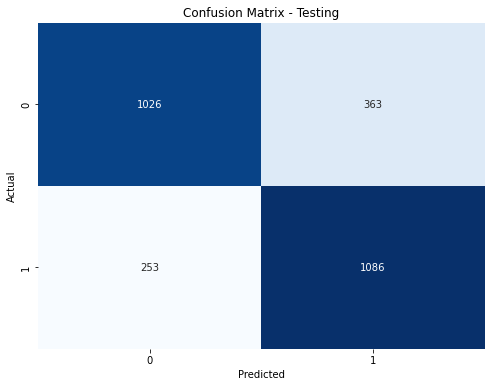

In [37]:
model_scores_classification(lg3)
# similar to model scores but the scores are overfit 

### Multilayer Perceptron
Parameters that can be tweaked: (however, what is the case when some params are specific to another? like solvers, e.g. solver = 'adam, epsilon only applies to that solver?)
- <mark>hidden_layer_sizes</mark> : number of neurons in the hidden layer 
- <mark>activation</mark> : activation or squashing function for the hidden layer 
- <mark>solver</mark> : solver for weight optimization 
- <mark>max_iter</mark> : maximum number of iterations 
- <mark>alpha</mark> : regularisation term 

### hidden layer sizes vs. model accuracy (baseline model) 
- sizes that are too small limits the capacity of learning, but too high layers may make the model fit training data too closely 

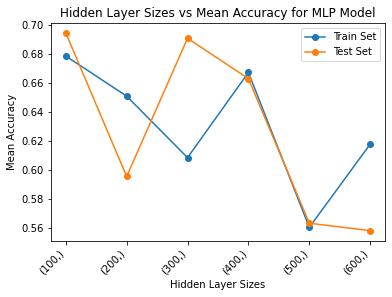

In [38]:
hidden_layer_sizes = [(i,) for i in range(100, 610, 100)]

train_mean_accuracies = []
test_accuracies = []

for size in hidden_layer_sizes:
    model = MLPClassifier(hidden_layer_sizes=size, random_state=42)
    
    # Perform 5-fold cross-validation on the training set
    train_accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Record the mean accuracy across folds on the training set
    train_mean_accuracies.append(np.mean(train_accuracies))
    
    # Fit the model on the full training set and evaluate on the test set
    model.fit(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot([str(size) for size in hidden_layer_sizes], train_mean_accuracies, marker='o', label='Train Set')
plt.plot([str(size) for size in hidden_layer_sizes], test_accuracies, marker='o', label='Test Set')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Mean Accuracy')
plt.title('Hidden Layer Sizes vs Mean Accuracy for MLP Model')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

### hidden layer sizes vs. model accuracy (baseline model)  - lower number of layers

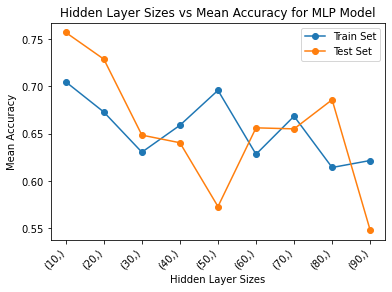

In [39]:
hidden_layer_sizes = [(i,) for i in range(10, 100, 10)]

train_mean_accuracies = []
test_accuracies = []

for size in hidden_layer_sizes:
    model = MLPClassifier(hidden_layer_sizes=size, random_state=42)
    
    # Perform 5-fold cross-validation on the training set
    train_accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Record the mean accuracy across folds on the training set
    train_mean_accuracies.append(np.mean(train_accuracies))
    
    # Fit the model on the full training set and evaluate on the test set
    model.fit(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot([str(size) for size in hidden_layer_sizes], train_mean_accuracies, marker='o', label='Train Set')
plt.plot([str(size) for size in hidden_layer_sizes], test_accuracies, marker='o', label='Test Set')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Mean Accuracy')
plt.title('Hidden Layer Sizes vs Mean Accuracy for MLP Model')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
hidden_layer_sizes = [(i,) for i in range(1, 11, 1)]

train_mean_accuracies = []
test_accuracies = []

for size in hidden_layer_sizes:
    model = MLPClassifier(hidden_layer_sizes=size, random_state=42)
    
    # Perform 5-fold cross-validation on the training set
    train_accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Record the mean accuracy across folds on the training set
    train_mean_accuracies.append(np.mean(train_accuracies))
    
    # Fit the model on the full training set and evaluate on the test set
    model.fit(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot([str(size) for size in hidden_layer_sizes], train_mean_accuracies, marker='o', label='Train Set')
plt.plot([str(size) for size in hidden_layer_sizes], test_accuracies, marker='o', label='Test Set')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Mean Accuracy')
plt.title('Hidden Layer Sizes vs Mean Accuracy for MLP Model')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### batch size vs. model accuracies 


In [ ]:
batch_sizes = [200, 300, 400, 500, 600, 700, 800, 900, 1000]

train_accuracies = []
test_accuracies = []

# Train MLP models with different batch sizes
for batch_size in batch_sizes:
    model = MLPClassifier(batch_size=batch_size, random_state=42)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Evaluate accuracy on the training set
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Evaluate accuracy on the test set
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot(batch_sizes, train_accuracies, marker='o', label='Train Set')
plt.plot(batch_sizes, test_accuracies, marker='o', label='Test Set')
plt.xlabel('Batch Sizes')
plt.ylabel('Accuracy')
plt.title('Batch Sizes vs Accuracy for MLP Model')
plt.legend()
plt.show()

In [ ]:
batch_sizes = [i for i in range(10, 110, 10)]

train_accuracies = []
test_accuracies = []

# Train MLP models with different batch sizes
for batch_size in batch_sizes:
    model = MLPClassifier(batch_size=batch_size, random_state=42)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Evaluate accuracy on the training set
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Evaluate accuracy on the test set
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot(batch_sizes, train_accuracies, marker='o', label='Train Set')
plt.plot(batch_sizes, test_accuracies, marker='o', label='Test Set')
plt.xlabel('Batch Sizes')
plt.ylabel('Accuracy')
plt.title('Batch Sizes vs Accuracy for MLP Model')
plt.legend()
plt.show()

### max_iter vs. model accuracies (higher iterations) 

In [ ]:
max_iters = [100,200,300,400,500,600,700,800,900,1000]

train_accuracies = []
test_accuracies = []

# Train MLP models with different max_iter values
for max_iter in max_iters:
    model = MLPClassifier(max_iter=max_iter, random_state=42)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Evaluate accuracy on the training set
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Evaluate accuracy on the test set
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot(max_iters, train_accuracies, marker='o', label='Train Set')
plt.plot(max_iters, test_accuracies, marker='o', label='Test Set')
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Max Iterations vs Accuracy for MLP Model')
plt.legend()
plt.show()

### max iter against model accuracies 

In [ ]:
max_iters = [i for i in range(10, 110, 10)]

train_accuracies = []
test_accuracies = []

# Train MLP models with different max_iter values
for max_iter in max_iters:
    model = MLPClassifier(max_iter=max_iter, random_state=42)
    
    # Train the model on the training set
    model.fit(X_train, y_train)
    
    # Evaluate accuracy on the training set
    train_accuracy = model.score(X_train, y_train)
    train_accuracies.append(train_accuracy)
    
    # Evaluate accuracy on the test set
    test_accuracy = model.score(X_test, y_test)
    test_accuracies.append(test_accuracy)

# Plotting the graph
plt.plot(max_iters, train_accuracies, marker='o', label='Train Set')
plt.plot(max_iters, test_accuracies, marker='o', label='Test Set')
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.title('Max Iterations vs Accuracy for MLP Model')
plt.legend()
plt.show()

### alpha (regularisation) vs. models accuracies 

In [ ]:
alphas = [0.001, 0.01, 0.1]

train_scores, test_scores = validation_curve(
    mlp, X_train, y_train, param_name="alpha", param_range=alphas, cv=5
)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(alphas, np.mean(train_scores, axis=1), label="Train Score", marker='o')
plt.plot(alphas, np.mean(test_scores, axis=1), label="Test Score", marker='o')
plt.xscale('log')  # Use this line if you still want the x-axis to be log-scaled
plt.title("Validation Curve for MLPClassifier")
plt.xlabel("Alpha (Regularization Term)")
plt.ylabel("Score")
plt.legend()
plt.show()

### Hyperparameter Tuning using GridSearchCV 

### 1st iteration - lower layer sizes

In [ ]:
param_grid = {'hidden_layer_sizes' : [(1,),(4,),(7,),(10,)], # lower layer sizes prevents overfitting as compared to higher sizes
              'activation' : ['identity','logistic','tanh','relu'],
              'solver' : ['lbfgs','adam','sgd'],
              'max_iter':[30,40,50]} # try a lower set of iterations 

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

In [ ]:
mlp2 = MLPClassifier(activation = 'logistic',
                     hidden_layer_sizes=(7,),
                     max_iter=50,
                     solver='lbfgs',
                    random_state=42).fit(X_train,y_train)

In [ ]:
model_scores_classification(mlp2)

# created mlp2 - the scores are not too overfitted
# the score improved, but can stil be improved 

### 2nd iteration - higher layer sizes

In [ ]:
param_grid = {'hidden_layer_sizes' : [(10,),(40,),(70,),(100,)], # lower layer sizes prevents overfitting as compared to higher sizes
              'activation' : ['identity','logistic','tanh','relu'],
              'solver' : ['lbfgs','adam','sgd'],
              'max_iter':[30,40,50]} # try a lower set of iterations 

In [ ]:
start_time = time.time()

grid = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

In [ ]:
mlp3= MLPClassifier(activation = 'relu',
                     hidden_layer_sizes=(10,),
                     max_iter=50,
                     solver='adam',
                    random_state=42).fit(X_train,y_train)

In [ ]:
model_scores_classification(mlp3)

# scores went lower, and it is more overfit now 
# issue of overfitting does not exactly relate to layer sizes and iterations 

### 3rd iteration - higher max_iter, and higher layer sizes 
- deviating from our previous approach : we use more iterations and higher layer sizes to let the model learn better 

In [ ]:
param_grid = {'hidden_layer_sizes' : [(100,),(200,),(300,)], 
              'activation' : ['identity','logistic','tanh','relu'],
              'solver' : ['lbfgs','adam','sgd'],
              'max_iter':[100,300,500]} 

In [ ]:
start_time = time.time()

# grid = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy',verbose = 3,refit=True).fit(X_train,y_train)

end_time = time.time()

elapsed_time = end_time - start_time

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

minutes, seconds = divmod(elapsed_time, 60)
formatted_time = "{:02}:{:02}".format(int(minutes), int(seconds))
print("Elapsed Time: {}".format(formatted_time))

In [ ]:
mlp4 = MLPClassifier(activation = 'tanh',
                     hidden_layer_sizes = (100,),
                     max_iter = 500,
                     solver='lbfgs',
                     random_state=42).fit(X_train,y_train)

In [ ]:
model_scores_classification(mlp4)

# model is not overfitted, train and test scores are close
# find ways to increase the score? 

### 4th iteration - add regularization 

In [ ]:
mlp5 = MLPClassifier(activation = 'tanh',
                     hidden_layer_sizes = (100,),
                     max_iter = 10000000,
                     solver='lbfgs',
                     random_state=42).fit(X_train,y_train)

In [ ]:
model_scores_classification(mlp5)

In [ ]:
mlp = MLPClassifier(activation ='logistic', 
                    hidden_layer_sizes=(10,), 
                    max_iter= 2000, 
                    solver = 'sgd', 
                    random_state=2)
# Fit the model to the training set
mlp.fit(X_train,y_train)

model_scores_classification(mlp)

## 2. Airbnb

### 2.1 Load and Sample the data

### 2.2 Build the Model(s)

### 2.3 Evaluate and Improve the Model(s)